# Итоговый проект

Данный модуль является заключительным для обязательных глав курса по SageMath. В рамках итогового проекта студент должен будет выполнить одну объемную задачу, покрывающую в той или иной степени все рассмотренные темы: от символьных вычислений и графиков, до основ линейной алгебры в Sage. Прошу обратить внимание, что Ваша работа будет проверяться такими же студентами, как и Вы, поэтому:
1. Грамотно оформляйте свою работу, пишите подробные комментарии, что вы делаете (либо же вставляйте в Ваше копию блокнота блоки Markdown, содержащие пояснения). 
2. Работа будет считаться выполненной только после того, как автор работы проверит не менее 3-х работ других студентов.

## Условие задания

В данной работе Вам будет необходимо привести к каноническому виду уравнения кривой и поверхности второго порядка по данному Вам варианту. Просьба, после этого блока вставить блок Markdown с указанием номера Вашего варианта. План работы над заданием:
1. Задать уравнения кривой второго порядка и поверхности второго порядка в символьном виде.
2. Построить графики заданной кривой и поверхности. Обратить внимание на расположение координаты 0, 0.
3. Привести аналитически (например, методом ортогонального преобразования) квадратичные формы, описывающие кривую и поверхность второго порядка к каноническому виду.
4. Построить графики приведенных к каноническому виду кривой и поверхности второго порядка. 
5. Сделать выводы, оформить блокнот.

## Пример задания
Пусть вам задана следующая квадратичная форма:
    $$ y^2−x^2/10−2xy−x−y=0$$

In [99]:
x, y = var("x,y")
F = y^2-x^2/10-2*x*y-x-y

Теперь построим график заданной кривой:

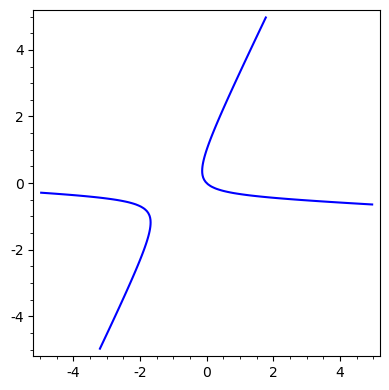

In [100]:
implicit_plot(F,(x, -5, 5),(y, -5, 5))

Теперь найдем асимптоты (при наличии) и также добавим их на график:

**Алгоритм построения ассимптот.**

Ассимптота - прямая, обладающая тем свойством, что расстояние от точки: $(x, f(x))$ графика функции до этой прямой стремится к нулю при неограниченном удалении точки графика от начала координат. Задается уравнением вида:
$$ y = kx +  b $$
У функции может не быть ассимптот, а может и быть бесконечно много, тут так сразу не угадаешь. Благо, жизнь нам предлагает алгоритм по нахождению ассимптот функции, при этом этот же алгоритм позволяет доказать, что ассимптот не существует.

Ассимптота существует, если оба предела: $$\lim_{x\to \infty} \frac{f(x)}{x}=k$$  и  $$\lim_{x\to \infty} {f(x)-kx}=b$$ существуют и не равны бесконечности.

Но жестокая судьба так и шепчет, что не все так просто. И дейтсвительно, ведь функция, заданная выше, задана неявно, а значит, для нахождения ее ассимптот нужны более общие правила.

Имеем что-то вроде: $$F(x,y)=0 $$  Пусть асимптота описывается уравнением $y=kx+b$, тогда, подставляя это выражение для $y$ в уравнение кривой, получаем алгебраическое уравнение относительно одной переменной $x$:
$${A_0}{x^n} + {A_1}{x^{n - 1}} +  \ldots  + {A_{n - 1}}x + {A_n} = 0$$

где коэффициенты $A_i$зависят от параметров асимптоты $k$ и $b$ (причем коэффициент $A_0$ зависит лишь от $k$). Значения $k$ и $b$ определяются из условия:
$$\left\{ \begin{array}{l}
{A_0}\left( k \right) = 0\\
{A_1}\left( {k,b} \right) = 0
\end{array} \right..$$

Для нахождения вертикальной асимптоты нужно подставить ее уравнение $x=a$ в уравнение кривой и преобразовать последнее к виду:

$${B_0}{y^n} + {B_1}{y^{n - 1}} +  \ldots  + {B_{n - 1}}y + {B_n} = 0$$

Необходимым условием существования вертикальной асимптоты является отсутствие в последнем уравнении старшего члена ${B_0}{y^n}$ Значение параметра $a$ определяется из условия:
$${B_1}\left( a \right) = 0$$

Приведенные формулы для асимптот неявно заданных кривых справедливы, если кривая не имеет особых точек на бесконечности.

Подставим $ y = kx+b$ в уравнение и приведем подобные:

In [101]:
k, b, x = var('k, b, x')
y = k * x + b #обозначаем y как kx + b
f = factor(F(x,y)) #раскрываем скобки, приводим подобные
print(f)

k^2*x^2 + 2*b*k*x - 2*k*x^2 + b^2 - 2*b*x - k*x - 1/10*x^2 - b - x


Далее возьмем коэфициенты при двух старших степенях х.

In [102]:
f1 = f.coefficient(x,2)
f2 = f.coefficient(x,1)

И, наконец, решим систему из полученных уравнений, найдя k и b:

In [103]:
[k1, b1, k2, b2] = [j.rhs() for i in solve([f1, f2], [k, b]) for j in i]

Теперь остается добавить на график обе ассимптоты:

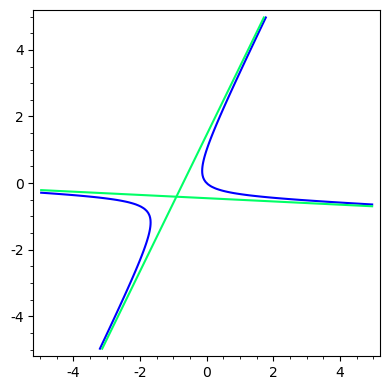

In [104]:
y = var("y")
assimp1 = y - k1*x - b1

assimp2 = y - k2*x - b2

p1 = implicit_plot(F, (x, -5, 5), (y, -5, 5)) #Строим график f(x, y) = 0 с помощью implicit_plot()
p2 = implicit_plot(assimp1, (x, -5, 5), (y, -5, 5), rgbcolor = hue(0.4)) #Строим график assimp1 с помощью implicit_plot()
p3 = implicit_plot(assimp2, (x, -5, 5), (y, -5, 5), rgbcolor = hue(0.4)) #Строим график assimp2 с помощью implicit_plot()
show(p1+p2+p3) #показ трёх графиков в одних координатах


1. Теория по построению асимптот неявно заданной функции
2. Задание на нахождение производной неявно заданной функции
3. Построить график производной функции, которая задает кривую 2-го порядка (синим цветом выделить промежутки убывания функции, красным - возрастания).
4. Заставить найти точку пересечения асимптот

Осталось только найти точку пересечения ассимптот:

In [105]:
[x0, y0] = [j.rhs() for i in solve([assimp1, assimp2], x, y) for j in i]
y0, x0

(-9/22, -10/11)

Для удобной работы с уравнением кривой второго порядка, само уравнения надо представить в виде суммы некоей квадратичной формы и линейного функционала. В данном случае часть уравнения, являющаяся КФ имеет вид:
                           $$ 14x^2 - 7y^2 + 20xy $$
Линейная часть выглядит так:
 $$ 8x + 34y $$
Введем теперь вектор $v$:
$$ v = v_e = (x, y)^T $$
Тогда если обозначить матрицу квадратичной формы за $Q$, а матрицу линейного функционала за $L$, то наше уравнение примет следующий вид:
$$ v^T * Q * v + L*v = 35$$

Ваша текущая задача заключается в том, чтобы составить матрицы Q и L:
(Замечание: в SageMath существует объект QuadraticForm, который позволяет работать не с абстрактными матрицами, а с матрицами именно квадратичной формы. Решение, реализованное не по шаблону, с использованием QuadraticForm также будет приниматься, но рассматриваться в ноутбуке не будет).

In [126]:
Q = matrix([[F.coefficient(x, 2), (F.coefficient(x*y, 1))/2],[(F.coefficient(x*y, 1))/2, F.coefficient(y, 2)]])
L = matrix([F.coefficient(x^1)(y=0), F.coefficient(y^1)(x=0)])

Теперь нам нужно диагонализировать матрицу КФ: для этого нам нужно перейти из стандартного базиса к базису из собственных векторов. Следовательно, следует найти собственные числа и векторы матрицы $Q$:

In [134]:
# self_num = Q.eigenavlues()
self_vec = Q.eigenvectors_right(); self_vec

[(-1/20*sqrt(521) + 9/20, [(1, 1/20*sqrt(521) - 11/20)], 1),
 (1/20*sqrt(521) + 9/20, [(1, -1/20*sqrt(521) - 11/20)], 1)]

Получив собственные векторы матрицы можно задать матрицу перехода от стандартного базиса в $R^2$ к базису из собственных векторов. Запишите матрицу перехода, составив ее из собственных векторов и при необходимости избавившись от дробей в векторах (вектора следует нормировать):

In [ ]:
#YOUR CODE

Теперь проверьте равенство норм обоих собственных векторов (обратите внимение, здесь используется стандартная евклидова, т.е. вторая, норма):

In [ ]:
#YOUR CODE

Перепишем теперь матрицу $Q$ в новом базисе:

In [ ]:
#YOUR CODE

Теперь подставим полученные переменные в наше исходное уравнение:

In [ ]:
#YOUR CODE

Для проверки решения снова построим график:

In [ ]:
#YOUR CODE

Если все было сделано верно, то мы должны были добиться поворота графика таким образом, чтобы он стал параллелен одной из осей координат. Остались только последние штрихи: отцентрировать график.

In [ ]:
#YOUR CODE

In [ ]:
#YOUR CODE

Теперь путем параллельного переноса отцентрируем график гиперболы:

**Замечание.** Сдвигать надо на значение х и у, полученные полученные в предыдущем шаге(точки пересечения ассимптот функции после поворота)

In [ ]:
#YOUR CODE (обратить внимание на замену переменных (тут используется параллельный сдвиг))


In [ ]:
#YOUR CODE

Поздравляем! С помощью параллельного переноса график гиперболы был отцентрирован, а первая часть проекта завершена.